# Clustering Model
A notebook that predicts loan grade for Problem 2 using KNN

In [1]:
#Imports

#Data
import pandas as pd
import numpy as np

#Date
import datetime as dt
from datetime import datetime

#Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#ML

#General
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#knn
from sklearn.neighbors import KNeighborsClassifier

In [8]:
#Getting the csv file's name with the wrangled data
data_file='wrang_xyz_data.csv'

#Splitting the data into different categories that make sense
loan_data=['purpose','initial_list_status','term','loan_amnt']
emp_data=['emp_length','collections_12_mths_ex_med','acc_now_delinq','home_ownership','annual_inc','verification_status','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','total_acc','earliest_cr_line','dti','tot_cur_bal','tot_coll_amt'] #address

#The following inputs are left out as they are only useful for problem 1.
#out=['last_pymnt_d','last_credit_pull_d','recoveries','collection_recovery_fee','last_pymnt_amnt','total_pymnt','total_rec_int','int_rate','out_prncp',''total_rec_late_fee','default_ind']

#Getting the features that will be included in the model
features=loan_data+emp_data

In [3]:
#Clustering model predicting loan grade for problem 2
#The model's inputs are the data_file which should be set equal to the wrangled data file and the value to be predicted 
#(pred_value) which in this case is the 'grade'. It could also be the 'sub_grade'

def get_model_clus(data_file='wrang_xyz_data.csv',pred_value=['grade']):
    #Imporitng the wrangled csv file and including the useful columns for it
    df = pd.read_csv('data/'+data_file,usecols=features+pred_value)

    #Creating X and y variables for input and output
    X=df.drop(pred_value[0],axis=1)
    y=df[pred_value[0]]

    X_scale=X.drop(['purpose','verification_status','home_ownership','initial_list_status','term'],axis=1)
    X_non_scale=X[['purpose','verification_status','home_ownership','initial_list_status','term']]
    #Scaling the data
    scaler = StandardScaler()
    scaler.fit(X_scale)
    X_scale = pd.DataFrame(scaler.transform(X_scale),index=X.index,columns=X_scale.columns)
    X=X_scale.join(X_non_scale)


    #Splitting the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)

    #One-hot Encoding
    ohe_cols=['purpose','verification_status','home_ownership','initial_list_status','term'] #address
    ohe = OneHotEncoder(handle_unknown='ignore')
    ohe.fit(X_train[ohe_cols])
    X_train_enc = pd.DataFrame(ohe.transform(X_train[ohe_cols]).toarray(),index=X_train.index)
    X_train=X_train.join(X_train_enc).drop(ohe_cols,axis=1)
    X_train.columns = X_train.columns.map(str)
    X_test_enc = pd.DataFrame(ohe.transform(X_test[ohe_cols]).toarray(),index=X_test.index)
    X_test=X_test.join(X_test_enc).drop(ohe_cols,axis=1)
    X_test.columns = X_test.columns.map(str)

    #Using the K-Neirghest-Neighours algorith for clustering
    model_clus = KNeighborsClassifier(n_neighbors=5)
    model_clus.fit(X_train,y_train)
    y_clus_pred = model_clus.predict(X_test)

    #Printing useful metrics
    print(confusion_matrix(y_test, y_clus_pred))
    print(classification_report(y_test, y_clus_pred))

    return model_clus
#Running the function 
model_clus=get_model_clus(pred_value=['grade'])

[[20970 12196  2722   412    44     4     0]
 [15105 29877 13859  2658   498    48     0]
 [ 6787 22436 21341  6456  1917   237    19]
 [ 2138  9616 12946  6016  2251   347    28]
 [  480  3133  6352  3984  2179   460    36]
 [   77   611  1760  1506   957   273    34]
 [    9   112   372   329   267   115    14]]
              precision    recall  f1-score   support

           0       0.46      0.58      0.51     36348
           1       0.38      0.48      0.43     62045
           2       0.36      0.36      0.36     59193
           3       0.28      0.18      0.22     33342
           4       0.27      0.13      0.18     16624
           5       0.18      0.05      0.08      5218
           6       0.11      0.01      0.02      1218

    accuracy                           0.38    213988
   macro avg       0.29      0.26      0.26    213988
weighted avg       0.36      0.38      0.36    213988



Text(0, 0.5, 'Error Rate')

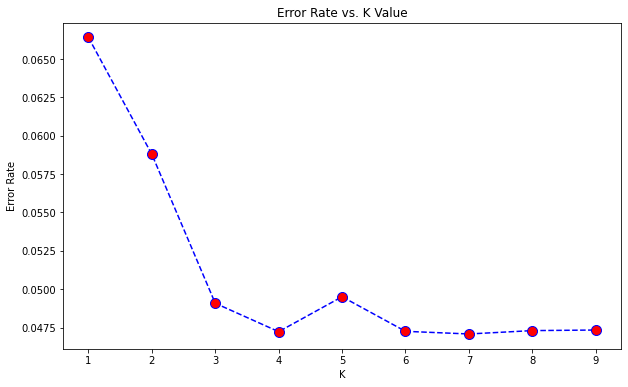

In [3]:
#This code will print a graph of error vs k value which will let you choose an appropriate 
#K
pred_value=['sub_grade']
features=['int_rate']
data_file='wrang_xyz_data.csv'
df = pd.read_csv('data/'+data_file,usecols=features+pred_value)

#Creating X and y variables for input and output
X=df.drop(pred_value[0],axis=1)
y=df[pred_value[0]]

#Scaling the data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)


#Creating empty error rate list
error_rate = []

#Running the algorithm for different values of k
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
     markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [9]:
#Running the clustering model for sub_grade, but with intrest rate being the only input as it is highly correlated to grade and sub-grade
def get_model_clus(data_file='wrang_xyz_data.csv',pred_value=['sub_grade']):
    #Imporitng the wrangled csv file and including the useful columns for it
    features=['int_rate']
    df = pd.read_csv('data/'+data_file,usecols=features+pred_value)

    #Creating X and y variables for input and output
    X=df.drop(pred_value[0],axis=1)
    y=df[pred_value[0]]

    #Scaling the data
    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)

    #Splitting the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)

    #Using the K-Neirghest-Neighours algorith for clustering
    model_clus = KNeighborsClassifier(n_neighbors=7)
    model_clus.fit(X_train,y_train)
    y_clus_pred = model_clus.predict(X_test)

    #Printing useful metrics
    print(confusion_matrix(y_test, y_clus_pred))
    print(classification_report(y_test, y_clus_pred))

    return model_clus
    
#Running the function 
model_clus=get_model_clus(pred_value=['sub_grade'])

[[5689   15    4 ...    0    0    0]
 [   0 5601    0 ...    0    0    0]
 [   0    0 5633 ...    0    0    0]
 ...
 [   0    0    0 ...  202    0    0]
 [   0    0    0 ...    0  116    0]
 [   0    0    0 ...    0    0  100]]
              precision    recall  f1-score   support

          A1       1.00      1.00      1.00      5708
          A2       1.00      1.00      1.00      5601
          A3       1.00      0.97      0.99      5789
          A4       0.98      1.00      0.99      8516
          A5       1.00      1.00      1.00     10971
          B1       0.68      0.94      0.79     11080
          B2       0.97      0.39      0.56     11746
          B3       0.83      0.86      0.85     13677
          B4       0.74      0.88      0.80     13620
          B5       0.91      0.75      0.82     11844
          C1       0.76      0.90      0.82     12924
          C2       0.91      0.84      0.87     12661
          C3       0.96      0.94      0.95     12095
          C4   